# Zadanie 8. Oszukiwanie CNN

1. Weź zdjęcie ze zbioru walidacyjnego CIFAR10.
2. Dodaj do zdjęcia szum (np. szum gaussowski).
3. Wykorzystaj sieć wyuczoną w którymś z poprzednich kroków (lub wyucz sieć od nowa) i sprawdź, jak sobie radzi ze zdjęciem z szumem.
4. *Dodaj szum do wszystkich zdjęć w zbiorze walidacyjnym i sprawdź różnice accuracy.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf

#budowa modelu
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same',
                 input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

#kompilacja modelu
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#trenowanie
history = model.fit(train_x, train_y_one_hot,
                   batch_size=64, epochs=1, verbose=True,
                   validation_data=(test_x, test_y_one_hot))


782/782 [==============================] - 27s 14ms/step - loss: 1.6201 - accuracy: 0.4177 - val_loss: 1.9706 - val_accuracy: 0.3578


In [ ]:
model.evaluate(test_x, test_y_one_hot)

313/313 [==============================] - 1s 4ms/step - loss: 1.9706 - accuracy: 0.3578


[1.9705801010131836, 0.3578000068664551]

In [ ]:
import numpy as np

In [ ]:
# szum gaussowski - średnia 0, std 1/10
random_noise = np.random.randn(*test_x[0].shape)/10

In [ ]:
np.mean(random_noise), np.std(random_noise)

(0.0015201325510621527, 0.10016644299330789)

In [ ]:
# dodanie szumu do obrazu
noisy_img = np.add(test_x[0], random_noise)

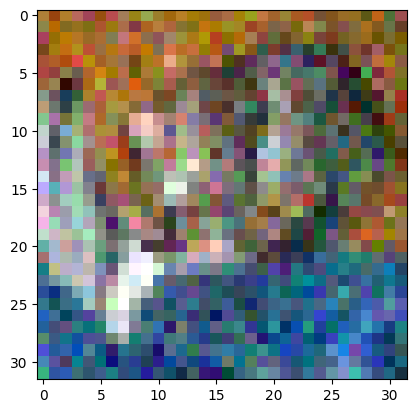

In [ ]:
# obraz z szumem
plt.imshow(noisy_img, cmap='gray')

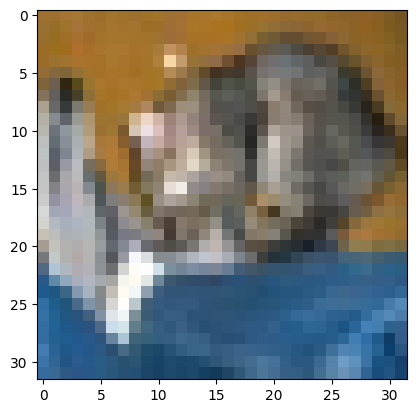

In [ ]:
# oryginalny obraz
plt.imshow(test_x[0], cmap='gray')

In [ ]:
# klasa oryginalnego obrazu
np.argmax(model(np.reshape(test_x[0], (-1, *test_x[0].shape))))

3

In [ ]:
model(np.reshape(test_x[0], (-1, *test_x[0].shape)))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.00240321, 0.00074046, 0.0323435 , 0.53878736, 0.02386259,
        0.31248915, 0.03598696, 0.04711585, 0.00378748, 0.00248342]],
      dtype=float32)>

In [ ]:
test_x[0].shape

(32, 32, 3)

In [ ]:
# klasa obrazu z szumem
np.argmax(model(np.reshape(noisy_img, (-1, *noisy_img.shape))))

6

In [ ]:
# dodanie szumu do wszystkich obrazów w zbiorze testowym
test_x_noisy = []
for x_sample in test_x:
  random_noise = np.random.randn(*test_x[0].shape)/20
  noisy_img = np.add(x_sample, random_noise)
  test_x_noisy.append(noisy_img)
test_x_noisy = np.stack(test_x_noisy)

In [ ]:
# ewaluacja
model.evaluate(test_x_noisy, test_y_one_hot)

313/313 [==============================] - 1s 4ms/step - loss: 1.1737 - accuracy: 0.6664


[1.173704743385315, 0.6664000153541565]